# Part I - (Loan Data From Prosper)
## by (CHIMA CALEB C)

## Introduction

In this investigation, I wanted to look at the characteristics of the data to answer the following questions
- What factors affect a loan’s outcome status?
- What affects the borrower’s APR or interest rate?
- Are there differences between loans depending on how large the original loan amount was?

## Dataset Overview

This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

`NB`
This data (dictionary) explains the variables in the data set.
the Focus of this analysis is basically  on about 15 of the the features.

In [3]:
#importing parkages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)
warnings.filterwarnings("ignore")

In [4]:
#Loading the Dataset
data = pd.read_csv("prosperLoanData.csv")
#loading the data Dictionary as well for easy reference
data_dict = pd.read_csv("Prosper Loan Data - Variable Definitions - Sheet1.csv")

In [5]:
#Displaying the first 5 rows of the dataset for accessing purpose
data.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

In [6]:
#displaying a short statistical description of the dataset(for numerical values)
data.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,StatedMonthlyIncome,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,113937.000000,106312.000000,113346.000000,113346.000000,106333.000000,106333.000000,113240.000000,113937.00000,113937.000000,113240.000000,112778.000000,113240.000000,106315.000000,112947.000000,113240.000000,106333.000000,1.063330e+05,106333.000000,106393.000000,106393.000000,106393.000000,106393.000000,105383.000000,1.139370e+05,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,18928.000000,113937.000000,16952.000000,113937.000000,113937.000000,113937.00000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,2.774209,96.071582,685.567731,704.567731,10.317192,9.260164,26.754539,6.96979,398.292161,1.435085,5.584405,0.592052,984.507059,4.154984,0.312646,0.015094,1.759871e+04,0.561309,11210.225447,23.230034,0.885897,0.802327,0.275947,5.608026e+03,1.421100,22.934345,22.271949,0.613629,0.048540,8472.311961,2930.313906,-3.223214,152.816539,16.268464,31.896882,69444.474271,8337.01385,272.475783,4183.079489,3105.536588,1077.542901,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,3.996797,94.480605,66.458275,66.458275,5.457866,5.022644,13.637871,4.63097,447.159711,2.437507,6.429946,1.978707,7158.270157,10.160216,0.727868,0.154092,3.293640e+04,0.317918,19818.361309,11.871311,0.148179,1.097637,0.551759,7.478497e+03,0.764042,19.249584,18.830425,2.446827,0.556285,7395.507650,3806.635075,50.063567,466.320254,9.005898,29.974184,38930.479610,6245.80058,192.697812,4790.907234,4069.527670,1183.414168,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-209.000000,0.000000,0.000000,0.000000,1.000000,1000.00000,0.000000,-2.349900,0.000000,-2.349900,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000

In [7]:
#displaying the percentage of null values present in the dataset, so that we can make decisions
#on weather to drop or fill up the null space
data.isnull().sum()*100/len(data)

ListingKey                              0.000000
ListingNumber                           0.000000
ListingCreationDate                     0.000000
CreditGrade                            74.588588
Term                                    0.000000
LoanStatus                              0.000000
ClosedDate                             51.649596
BorrowerAPR                             0.021942
BorrowerRate                            0.000000
LenderYield                             0.000000
EstimatedEffectiveYield                25.526387
EstimatedLoss                          25.526387
EstimatedReturn                        25.526387
ProsperRating (numeric)                25.526387
ProsperRating (Alpha)                  25.526387
ProsperScore                           25.526387
ListingCategory (numeric)               0.000000
BorrowerState                           4.840394
Occupation                              3.149109
EmploymentStatus                        1.979164
EmploymentStatusDura

### What is the structure of your dataset?

> - the dataset is of the shape 113937 rows and 81 columns
  - It contains a lot of null values such that some of the features has lost 70-88 percent of their values
  - contains some values which may probably appear unecessly for our analysis (lsiting keys ans some other uniques keys assigned to som features

### What is/are the main feature(s) of interest in your dataset?

> #### From acessing the above, i have choosed the following features to be used for my analysis
LoanOriginationDate
LoanOriginalAmount
LoanOriginationQuarter
Term
LoanStatus
BorrowerAPR
BorrowerRate
LenderYield
CreditScoreRangeLower
CreditScoreRangeUpper
ListingCategory
BorrowerState
Occupation
EmploymentStatus
EmploymentStatusDuration
IsBorrowerHomeowner

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

>
LoanOriginalAmount
LoanStatus
BorrowerAPR
BorrowerRate
BorrowerState
Occupation
EmploymentStatus
IsBorrowerHomeowner

In [8]:
data_ = data[['LoanOriginationDate','LoanOriginalAmount','LoanOriginationQuarter','Term','LoanStatus',
'BorrowerAPR','BorrowerRate','LenderYield','CreditScoreRangeLower','CreditScoreRangeUpper','ListingCategory (numeric)',
'BorrowerState','Occupation','EmploymentStatus','EmploymentStatusDuration','IsBorrowerHomeowner']]
data_.head(10)

,LoanOriginationDate,LoanOriginalAmount,LoanOriginationQuarter,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,CreditScoreRangeLower,CreditScoreRangeUpper,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner
0,2007-09-12 00:00:00,9425,Q3 2007,36,Completed,0.16516,0.1580,0.1380,640.0,659.0,0,CO,Other,Self-employed,2.0,True
1,2014-03-03 00:00:00,10000,Q1 2014,36,Current,0.12016,0.0920,0.0820,680.0,699.0,2,CO,Professional,Employed,44.0,False
2,2007-01-17 00:00:00,3001,Q1 2007,36,Completed,0.28269,0.2750,0.2400,480.0,499.0,0,GA,Other,Not available,NaN,False
3,2012-11-01 00:00:00,10000,Q4 2012,36,Current,0.12528,0.0974,0.0874,800.0,819.0,16,GA,Skilled Labor,Employed,113.0,True
4,2013-09-20 00:00:00,15000,Q3 2013,36,Current,0.24614,0.2085,0.1985,680.0,699.0,2,MN,Executive,Employed,44.0,True
5,2013-12-24 00:00:00,15000,Q4 2013,60,Current,0.15425,0.1314,0.1214,740.0,759.0,1,NM,Professional,Employed,82.0,True
6,2013-04-18 00:00:00,3000,Q2 2013,36,Current,0.31032,0.2712,0.2612,680.0,699.0,1,KS,Sales - Retail,Employed,172.0,False
7,2013-05-13 00:00:00,10000,Q2 2013,36,Current,0.23939,0.2019,0.1919,700.0,719.0,2,CA,Laborer,Employed,103.0,False
8,2013-12-12 00:00:00,10000,Q4 2013,36,Current,0.07620,0.0629,0.0529,820.0,839.0,7,IL,Food Service,Employed,269.0,True
9,2013-12-12 00:00:00,10000,Q4 2013,36,Current,0.07620,0.0629,0.0529,820.0,839.0,7,IL,Food Service,Employed,269.0,True


In [9]:
print(data_.shape) #checking for shape of the dataset
data_.isnull().sum() #checking for null values int he datset

(113937, 16)


LoanOriginationDate             0
LoanOriginalAmount              0
LoanOriginationQuarter          0
Term                            0
LoanStatus                      0
BorrowerAPR                    25
BorrowerRate                    0
LenderYield                     0
CreditScoreRangeLower         591
CreditScoreRangeUpper         591
ListingCategory (numeric)       0
BorrowerState                5515
Occupation                   3588
EmploymentStatus             2255
EmploymentStatusDuration     7625
IsBorrowerHomeowner             0
dtype: int64

The dataset appears unclean, so i need to clean and make it ready for analysis
- 
- convert laonOriginationDate to datetime
- clean off date from loanoriginalquarter
- Convert ListingCategory (numeric) to a corresponding alphabetical values since its use to represent state
- Fill up the null values with zero (0)

In [10]:
data_.head()

,LoanOriginationDate,LoanOriginalAmount,LoanOriginationQuarter,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,CreditScoreRangeLower,CreditScoreRangeUpper,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner
0,2007-09-12 00:00:00,9425,Q3 2007,36,Completed,0.16516,0.1580,0.1380,640.0,659.0,0,CO,Other,Self-employed,2.0,True
1,2014-03-03 00:00:00,10000,Q1 2014,36,Current,0.12016,0.0920,0.0820,680.0,699.0,2,CO,Professional,Employed,44.0,False
2,2007-01-17 00:00:00,3001,Q1 2007,36,Completed,0.28269,0.2750,0.2400,480.0,499.0,0,GA,Other,Not available,NaN,False
3,2012-11-01 00:00:00,10000,Q4 2012,36,Current,0.12528,0.0974,0.0874,800.0,819.0,16,GA,Skilled Labor,Employed,113.0,True
4,2013-09-20 00:00:00,15000,Q3 2013,36,Current,0.24614,0.2085,0.1985,680.0,699.0,2,MN,Executive,Employed,44.0,True


In [11]:
def cleaning(dat):
    dat['LoanOriginationDate'] = dat['LoanOriginationDate'].map(lambda x: str(x)[:-8])
    dat['LoanOriginationQuarter'] = dat['LoanOriginationQuarter'].map(lambda x: str(x)[:-4])
    dat=dat.replace({'ListingCategory (numeric)':{1:'A',2:'B',3:'C',4:'D',5:'E',6:'F',7:'G',8:'H',9:'I',10:'J',
                                              11:'K',12:'L',13:'M',14:'N',15:'O',16:'P',17:'Q',18:'R',19:'S',20:'T'}})
    dat.fillna(0,inplace = True)
    return dat

In [12]:
data_ =cleaning(data_)

In [13]:
data_.head()

,LoanOriginationDate,LoanOriginalAmount,LoanOriginationQuarter,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,CreditScoreRangeLower,CreditScoreRangeUpper,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner
0,2007-09-12,9425,Q3,36,Completed,0.16516,0.1580,0.1380,640.0,659.0,0,CO,Other,Self-employed,2.0,True
1,2014-03-03,10000,Q1,36,Current,0.12016,0.0920,0.0820,680.0,699.0,B,CO,Professional,Employed,44.0,False
2,2007-01-17,3001,Q1,36,Completed,0.28269,0.2750,0.2400,480.0,499.0,0,GA,Other,Not available,0.0,False
3,2012-11-01,10000,Q4,36,Current,0.12528,0.0974,0.0874,800.0,819.0,P,GA,Skilled Labor,Employed,113.0,True
4,2013-09-20,15000,Q3,36,Current,0.24614,0.2085,0.1985,680.0,699.0,B,MN,Executive,Employed,44.0,True


In [14]:
data_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   LoanOriginationDate        113937 non-null  object 
 1   LoanOriginalAmount         113937 non-null  int64  
 2   LoanOriginationQuarter     113937 non-null  object 
 3   Term                       113937 non-null  int64  
 4   LoanStatus                 113937 non-null  object 
 5   BorrowerAPR                113937 non-null  float64
 6   BorrowerRate               113937 non-null  float64
 7   LenderYield                113937 non-null  float64
 8   CreditScoreRangeLower      113937 non-null  float64
 9   CreditScoreRangeUpper      113937 non-null  float64
 10  ListingCategory (numeric)  113937 non-null  object 
 11  BorrowerState              113937 non-null  object 
 12  Occupation                 113937 non-null  object 
 13  EmploymentStatus           11

In [15]:
data_.describe()

,LoanOriginalAmount,Term,BorrowerAPR,BorrowerRate,LenderYield,CreditScoreRangeLower,CreditScoreRangeUpper,EmploymentStatusDuration
count,113937.00000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,8337.01385,40.830248,0.218780,0.192764,0.182701,682.011638,700.913084,89.642188
std,6245.80058,10.436212,0.080421,0.074818,0.074516,82.577903,83.399069,94.369148
min,1000.00000,12.000000,0.000000,0.000000,-0.010000,0.000000,0.000000,0.000000
25%,4000.00000,36.000000,0.156290,0.134000,0.124200,660.000000,679.000000,19.000000
50%,6500.00000,36.000000,0.209710,0.184000,0.173000,680.000000,699.000000,60.000000
75%,12000.00000,36.000000,0.283700,0.250000,0.240000,720.000000,739.000000,130.000000
max,35000.00000,60.000000,0.512290,0.497500,0.492500,880.000000,899.000000,755.000000


# Univariate Exploration
For faceting and multivariate plotting 
BorrowerAPR	BorrowerRate	LenderYield	EstimatedEffectiveYield	EstimatedLoss	EstimatedReturn

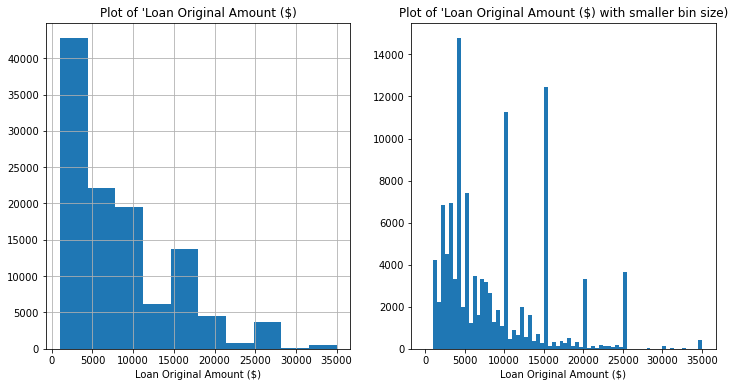

In [16]:
plt.figure(figsize = [12,6])
plt.subplot(1,2,1)
data_.LoanOriginalAmount.hist()
plt.xlabel('Loan Original Amount ($)')
# plt.yscale('log')
# plt.xscale('log')
plt.title("Plot of 'Loan Original Amount ($)");

plt.subplot(1,2,2)
bins_ = 500
bins = np.arange(0, 35000+500, 500)
data_.LoanOriginalAmount.hist(bins = bins, grid = False)
plt.xlabel('Loan Original Amount ($)')
# plt.yscale('log')
# plt.xscale('log')
plt.title("Plot of 'Loan Original Amount ($) with smaller bin size)");

The above is a distribution of Loan Original amount, from the first histogram , Loan distribution is skewed to the right and also after using a smaller bins size, on the second plot, its seen that they appeared a spike in amount at 10,000, 15,000 20,000, 25000 and also close to 5000

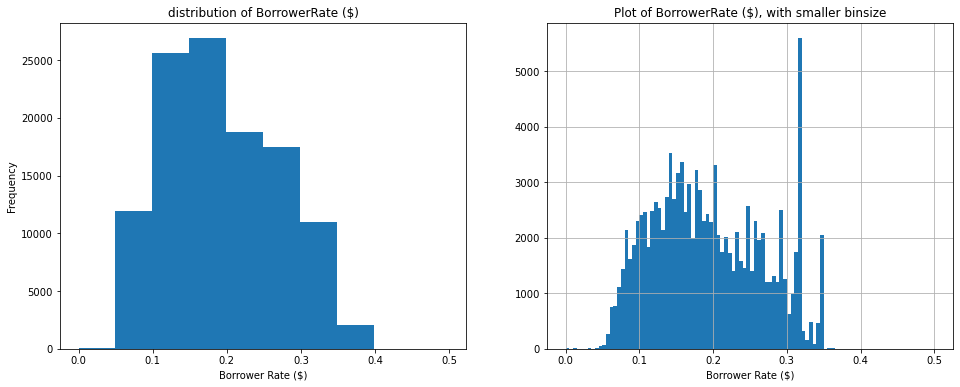

In [17]:
binsize = 0.003
bins = np.arange(0, data_['BorrowerRate'].max()+binsize, .005)
plt.figure(figsize=[16,6])

plt.subplot(1,2,1)
data_.BorrowerRate.plot(kind = "hist");
plt.xlabel('Borrower Rate ($)')
plt.title("distribution of BorrowerRate ($)");


plt.subplot(1,2,2)
data_.BorrowerRate.hist(bins = bins)
plt.xlabel('Borrower Rate ($)')
plt.title("Plot of BorrowerRate ($), with smaller binsize");


> The data appears schewed to the right but when i applied a smaller bin to it on the second plot, you see that the data appears to be a normal distribution with lots of spikes which might be as a result of outliers(suspected) or different anual percentage rate attarched to each person based on the volumn of his/her laon


Next feature to be explored is Borrower Sate, Listing Category, and occupation

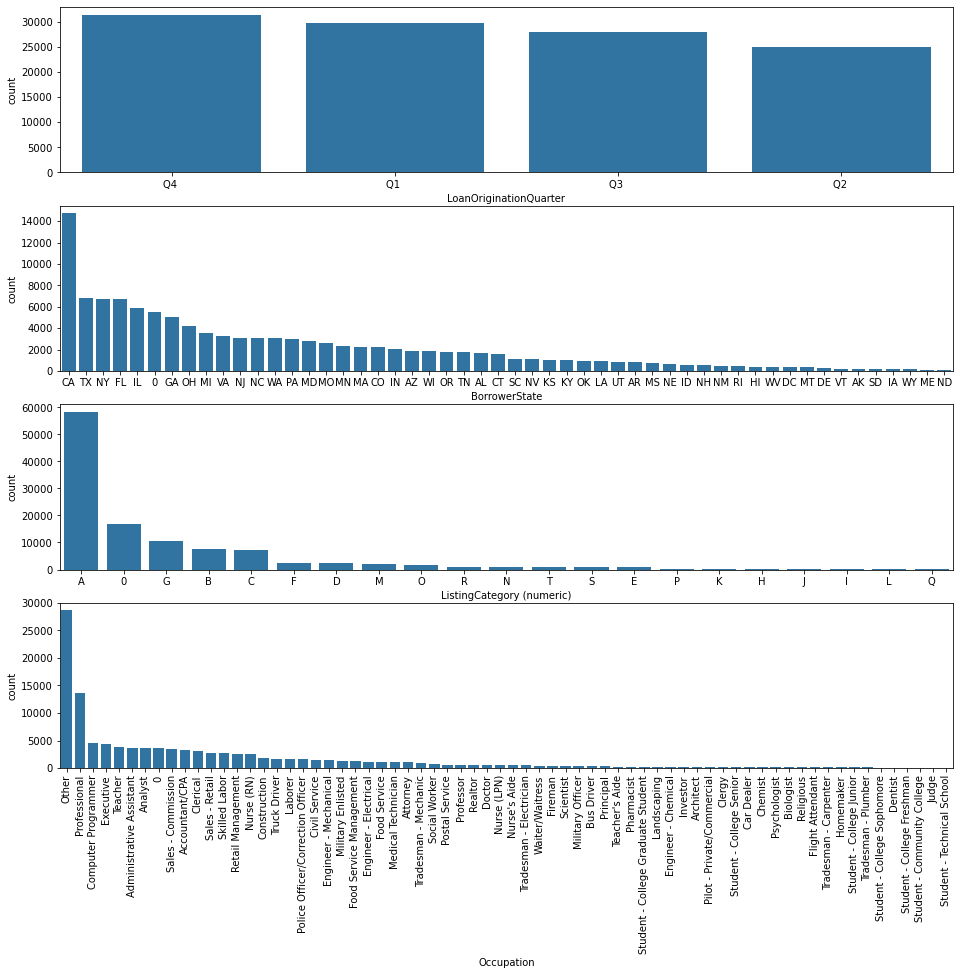

In [18]:
fig, ax = plt.subplots(nrows=4, figsize = [16,14])

default_color = sb.color_palette()[0]

sb.countplot(data = data_, x = 'LoanOriginationQuarter', color = default_color, ax = ax[0], order = data_['LoanOriginationQuarter'].value_counts().index)
sb.countplot(data = data_, x = 'BorrowerState', color = default_color, ax = ax[1], order = data_['BorrowerState'].value_counts().index)
sb.countplot(data = data_, x = 'ListingCategory (numeric)', color = default_color, ax = ax[2], order = data_['ListingCategory (numeric)'].value_counts().index)
sb.countplot(data = data_, x = 'Occupation', color = default_color, ax = ax[3], order = data_['Occupation'].value_counts().index)
plt.xticks(rotation =90)
plt.show()

- From the above, its seen that we have the largest population of Borowers from  CA  followed by TX
- We as well have that most people collect the loan for "Debt Consolidation", on the ListingCategory(numeric)
- We tend to have higher population of loners from the unspecified(Other) occupations and as well as the proffessionals and computer programmers

Next is Laon Status, & Term
- 

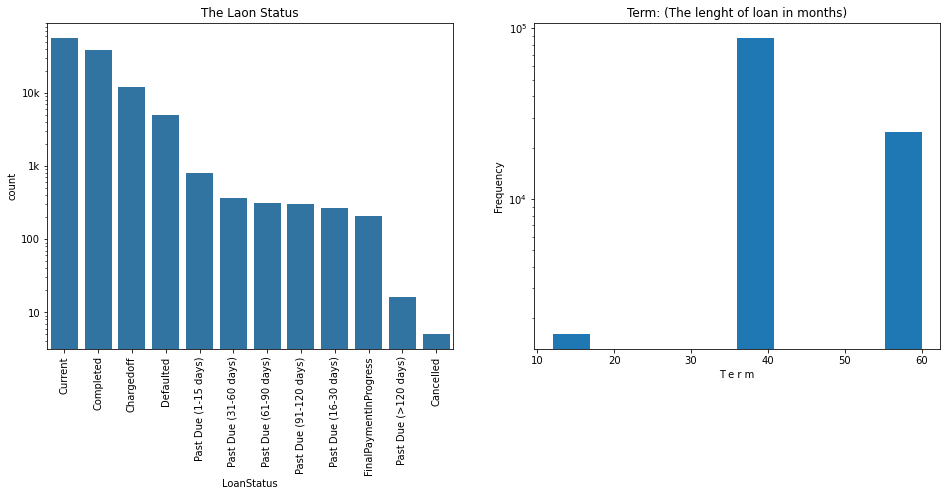

In [19]:
plt.figure(figsize=[16,6])

plt.subplot(1,2,1)
sb.countplot(data = data_, x = 'LoanStatus', color = default_color, order = data_['LoanStatus'].value_counts().index);
plt.title("The Laon Status")
plt.yscale('log')
plt.yticks([10, 1e2, 1e3, 1e4], [10, 100, '1k', '10k'])
plt.xticks(rotation =90);

plt.subplot(1,2,2)
data_.Term.plot(kind = "hist");
plt.xlabel('T e r m')
plt.yscale('log')
plt.title("Term: (The lenght of loan in months)");


the above shows that higher proportin of the Loaners are Currently on laon, followed by those who has complected theirs and very few are cancelled.

Therefore on the term (the lenght of loan in months), the higher population of the Loan Term is (40 months) followed by 60 months as well

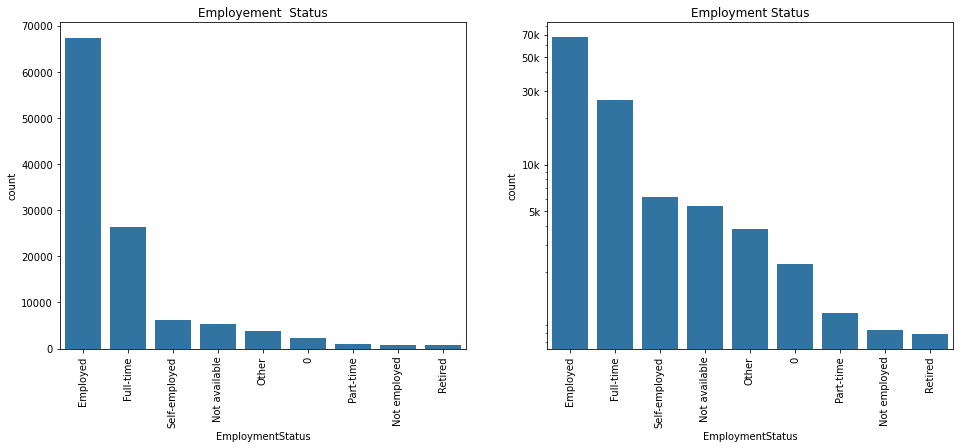

In [20]:
plt.figure(figsize=[16,6])

plt.subplot(1,2,1)
sb.countplot(data = data_, x = 'EmploymentStatus', color = default_color, order = data_['EmploymentStatus'].value_counts().index);
plt.title("Employement  Status")
# plt.yscale('log')
# plt.yticks([10, 1e2, 1e3, 1e4], [10, 100, '1k', '10k'])
plt.xticks(rotation =90);

plt.subplot(1,2,2)
sb.countplot(data = data_, x = 'EmploymentStatus', color = default_color, order = data_['EmploymentStatus'].value_counts().index);
plt.title("Employment Status")
plt.yscale('log')
plt.yticks([5e3, 10e3, 30e3, 50e3,70e3], ['5k','10k', '30k', '50k', '70k'])
plt.xticks(rotation =90);

This shows that the borrowers which are employed tends to be of higher proportion than others 

NB: the Zero(0) plotted is as a rsult of the null values i used to fill up the missing space instead of dropping them off to avoid interfaring with someother features

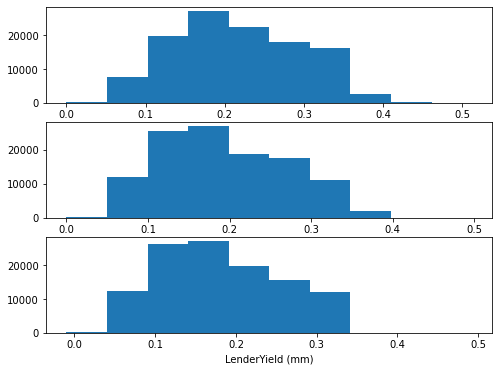

In [21]:
fig, ax = plt.subplots(nrows=3, figsize = [8,6])

variables = ['BorrowerAPR','BorrowerRate','LenderYield']
for i in range(len(variables)):
    var = variables[i]
    bins = np.arange(min(data_[var]), max(data_[var])+0.2, 0.2)
    ax[i].hist(data = data_, x = var)
    ax[i].set_xlabel('{} (mm)'.format(var))

plt.show()

the above shows a distribution of the 'BorrowerAPR','BorrowerRate'and 'LenderYield'
- 
the shape of the 'BorrowerAPR','BorrowerRate'and 'LenderYield' distributions are very similar to one another. The LenderYield distribution just looks slightly different since it takes a smaller range of values,
It's likely that these variables will be highly correlated with one another, and probably have a strong correlation with Loan Status

Next is plot matrix: sample 500 data_ so that plots are clearer and and can render faster

In [31]:
# selecting numerical features to be plottd
x = data_[['LoanOriginalAmount','BorrowerAPR','BorrowerRate','LenderYield','CreditScoreRangeLower','CreditScoreRangeUpper']]

In [32]:
x

,LoanOriginalAmount,BorrowerAPR,BorrowerRate,LenderYield,CreditScoreRangeLower,CreditScoreRangeUpper
0,9425,0.16516,0.1580,0.1380,640.0,659.0
1,10000,0.12016,0.0920,0.0820,680.0,699.0
2,3001,0.28269,0.2750,0.2400,480.0,499.0
3,10000,0.12528,0.0974,0.0874,800.0,819.0
4,15000,0.24614,0.2085,0.1985,680.0,699.0
...,...,...,...,...,...,...
113932,10000,0.22354,0.1864,0.1764,700.0,719.0
113933,2000,0.13220,0.1110,0.1010,700.0,719.0
113934,10000,0.23984,0.2150,0.2050,700.0,719.0
113935,15000,0.28408,0.2605,0.2505,680.0,699.0


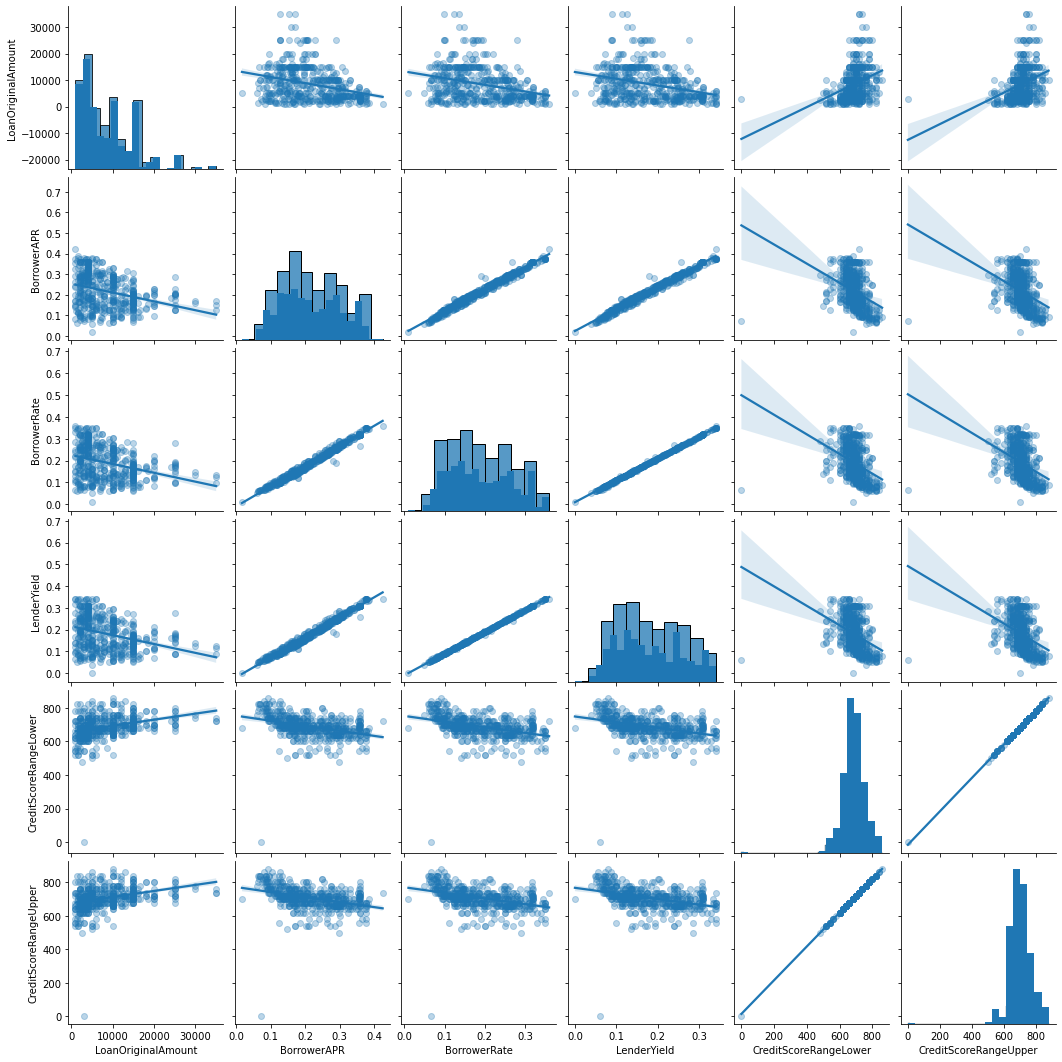

In [69]:
numeric_vars = x.columns
samples = np.random.choice(x.shape[0], 500, replace = False)
diamonds_samp = x.loc[samples,:]

g = sb.pairplot(data = diamonds_samp, vars = numeric_vars, kind = 'reg', plot_kws={'scatter_kws': {'alpha': 0.3}})
g = g.map_diag(plt.hist, bins = 20);
# g.map_offdiag(plt.scatter);
g;

As expected, the 'BorrowerAPR','BorrowerRate', and 'LenderYield' dimensions are all highly correlated with one another, and also the CredictScoreRangeLower and CredictScoreUpper has a strong coreation with each other.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

     - Yes, i did convert the listign category to object
     - On plotting the distribution of BorrowerRate it appeard to be skewed to the right
     - also neede to clean off date from the loan origination quartter
     - apply log tranformation to some of the features befoere plotting.



### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

    - The dataset appears unclean, so i need to clean and make it ready for analysis
    - I converted laonOriginationDate to datetime
    - I cleaned off date from loanoriginalquarter
    - I Converted ListingCategory (numeric) to a corresponding alphabetical values since its use to represent state
    - I did Fill up the null values with zero (0)

# Bivariate Eploration

plot matrix of numeric features ['LoanOriginalAmount', 'BorrowerAPR'] against categorical features.

In [ ]:
cate_feat = ['LoanOriginationQuarter','LoanStatus','IsBorrowerHomeowner']
samples = np.random.choice(data_.shape[0], 2000, replace = False)
data_samp = data_.loc[samples,:]

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)
    plt.xticks(rotation =90)

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = data_, y_vars = ['LoanOriginalAmount', 'BorrowerAPR'], x_vars = cate_feat,
                size = 3, aspect = 1.5)
g.map(boxgrid)
plt.show()

        From the above Borrowers who owes a house tends to higher amount of the loan than those who dosent have, though those who dosent owne a house tends to have a greater annual percentage rate than those who Own aHome.
        
    percentage of people who completed their laon tends to have higher annual percentage rate, and also those who their loans are cancealled seems to have borrowed smaller amount and also of lower annual percentage rate.
    those in Quarter 1 also seems they borrowed higher amount more than other Quarters

In [ ]:
cate_feat = ['ListingCategory (numeric)','EmploymentStatus']

samples = np.random.choice(data_.shape[0], 20000, replace = False)
data_samp = data_.loc[samples,:]

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)
    plt.xticks(rotation =90)

plt.figure(figsize = [18, 8])
g = sb.PairGrid(data = data_, y_vars = ['LoanOriginalAmount', 'BorrowerAPR'], x_vars = cate_feat,
                size = 3, aspect = 1.5)
g.map(boxgrid)
plt.show()

Interestingly, it appears that those employed got a higher amount of the loan or has the greater chance of getting a higher amoount of the loan, same thing applicable to those in the A category. then for those which their employment status is unspecified they tend to have a lower Annual Percentage Rate than others. on the other hand its seen that those listed in the G,A,B and C category tends to have a higher annual percentage rate than other categories, and also thos in the P,M,F,SD and E seems to have borrowed a lower amount when compared to that of C and A.
    - therefore from the above, The Loan Orignal Amount has a strong coleration with the Borrower Annual Percentage Rate

    Note: zero represents the null class

In [ ]:
plt.scatter(data = data_, x = 'BorrowerAPR', y = 'BorrowerRate');

In [ ]:
# data_.BorrowerState.value_counts().plot(kind = 'bar')
plt.figure(figsize = (12,8))
sb.boxplot(data =data_, x = 'BorrowerState', y = 'BorrowerAPR', color = base_color)
plt.title("Annual Percentage rate with respect to State")
plt.xticks(rotation = 90);

It is clear that Borrowers sate has agreat impact on the annual percentage rate since some states tends to have different annual percentage rate

In [ ]:
# since there's only three subplots to create, using the full data should be fine.
plt.figure(figsize = [12, 12])

# subplot 1: color vs cut
plt.subplot(3, 1, 2)
sb.countplot(data = data_, x = 'LoanOriginationQuarter', hue = 'LoanStatus', palette = 'Blues')
plt.yscale('log')
plt.yticks([1, 1e1, 1e2, 1e3, 1e4], [1,10, 100, '1k', '10k'])
plt.legend(bbox_to_anchor =(1, 1)) # re-arrange legend to remove overlapping

# subplot 2: clarity vs. cut
ax = plt.subplot(3, 1, 3)
sb.countplot(data = data_, x = 'IsBorrowerHomeowner', hue = 'LoanStatus', palette = 'Greens')
plt.yscale('log')
plt.yticks([1, 1e1, 1e2, 1e3, 1e4], [1,10, 100, '1k', '10k'])
plt.legend(bbox_to_anchor =(1, 1)) # re-arrange legend to reduce overlapping

# subplot 3: clarity vs. color, use different color palette
ax = plt.subplot(3, 1, 1)
sb.countplot(data = data_, x = 'EmploymentStatus', hue = 'LoanStatus', palette = 'Greens')
plt.yscale('log')
plt.yticks([1, 1e1, 1e2, 1e3, 1e4], [1,10, 100, '1k', '10k'])
plt.legend(bbox_to_anchor =(1, 1)) # re-arrange legend to remove overlapping
plt.xticks(rotation = 90)

plt.show()

    - Employment status:
    The Employment status has great impact on the loan status, on a closer look i observed that those are Not Employed, Retired and part-time dosent complet their laons.
    
    Some of the distributions apears same though deffers in different aspect, they seem not to be cancealing loans for those that are Eemployed and self employed as well  they also have a greater population among others... the cancealliation of loan seem to be more for the Retired borrowers than others, therefore Employment status has great impact on the Status of the loan.

- Is Borrower Home Owner:
the distribution Loan status among populations that own a home/morgage and those who does'nt appears thesame except Past_due_(31-60 days) and Past_due_(61-90 days) appears thesame for those that owne a home but (past due 31-60 and 91-120) appeears to have thesame number of counts. therefore i can say that it dosent really have much impart on the Loan Status
    
- Loan Origination Quarteer:
From the above the distribution of the four quarters (Q1,Q2,Q3 and Q4) appears to be thesame exccept Quarter 2 has greater population of completed loan status unlike other quarters that current of greater population, and secondly Quarter 3(Q3) seems not to have a cancealled loan status, therefore i can say that it does have a slight impact on the laon status
  
    
NB: zero (0) represents the null values presnt in the dataset, i used fill it up.

In [ ]:
# plt.subplot(1,1,1)
plt.figure(figsize = [8, 6])
plt.scatter(data = data_, x = 'LoanStatus', y = 'LoanOriginalAmount', alpha = 0.05)
# plt.xlim([0, 3.5])
plt.xlabel('Loan Status')
# plt.yscale('log')
plt.xticks(rotation = 90)
plt.yticks([5e3, 10e3, 15e3, 20e3, 25e3, 30e3, 35e3], ['5k', '10k', '15k', '20k', '25k', '30k', '35k'])
plt.ylabel('Loan Original Amount ($)')
plt.title("Loan Distribution with respect Loan Status")
plt.show()


# plt.subplot(1,2,2)
plt.figure(figsize = [8, 6])
base_color = sb.color_palette()[0]
sb.violinplot(data = data_, x = 'LoanStatus', y = 'LoanOriginalAmount', color = base_color);
plt.xticks(rotation = 90);

    - A closer look shows that greater population of those who completed their laons borrowed smaller ammount,   and also PAST DUE(91-120 days), DEFAULTED and CHARGEDOFF are relatively from those who borrowed higher amount 
    
 and also Borrowers with their past Dues greater than 120days and also those which their loan has been cancealled tend to have borrowed smaller amount and also on    applying a smaller alpha value shows that they are of smaller population.
    
- Therfore  the loan orignal amount has great impact on the loan status

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

>  Employment status:
The Employment status has great impact on the loan status, on a closer look i observed that those are Not Employed, Retired and part-time dosent complet their laons
 - Is Borrower Home Owner; Dosent really have much effect on the loan status


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Yes: on bivariate exploration i noticed that EmploymentStatusDuration and LenderYield has a strong correlation with BorrowerAPR and Loan Status as well

## Multivariate Exploration.

In [24]:
# compute the logarithm of price to make multivariate plotting easier
def log_trans(x, inverse = False):
    """ quick function for computing log and power operations """
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

data_['log_LoanAmount'] = data_['LoanOriginalAmount'].apply(log_trans)

In [25]:
data_

,LoanOriginationDate,LoanOriginalAmount,LoanOriginationQuarter,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,CreditScoreRangeLower,CreditScoreRangeUpper,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,log_LoanAmount
0,2007-09-12,9425,Q3,36,Completed,0.16516,0.1580,0.1380,640.0,659.0,0,CO,Other,Self-employed,2.0,True,3.974281
1,2014-03-03,10000,Q1,36,Current,0.12016,0.0920,0.0820,680.0,699.0,B,CO,Professional,Employed,44.0,False,4.000000
2,2007-01-17,3001,Q1,36,Completed,0.28269,0.2750,0.2400,480.0,499.0,0,GA,Other,Not available,0.0,False,3.477266
3,2012-11-01,10000,Q4,36,Current,0.12528,0.0974,0.0874,800.0,819.0,P,GA,Skilled Labor,Employed,113.0,True,4.000000
4,2013-09-20,15000,Q3,36,Current,0.24614,0.2085,0.1985,680.0,699.0,B,MN,Executive,Employed,44.0,True,4.176091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,2013-04-22,10000,Q2,36,Current,0.22354,0.1864,0.1764,700.0,719.0,A,IL,Food Service Management,Employed,246.0,True,4.000000
113933,2011-11-07,2000,Q4,36,FinalPaymentInProgress,0.13220,0.1110,0.1010,700.0,719.0,G,PA,Professional,Employed,21.0,True,3.301030
113934,2013-12-23,10000,Q4,60,Current,0.23984,0.2150,0.2050,700.0,719.0,A,TX,Other,Employed,84.0,True,4.000000
113935,2011-11-21,15000,Q4,60,Completed,0.28408,0.2605,0.2505,680.0,699.0,B,GA,Food Service,Full-time,94.0,True,4.176091


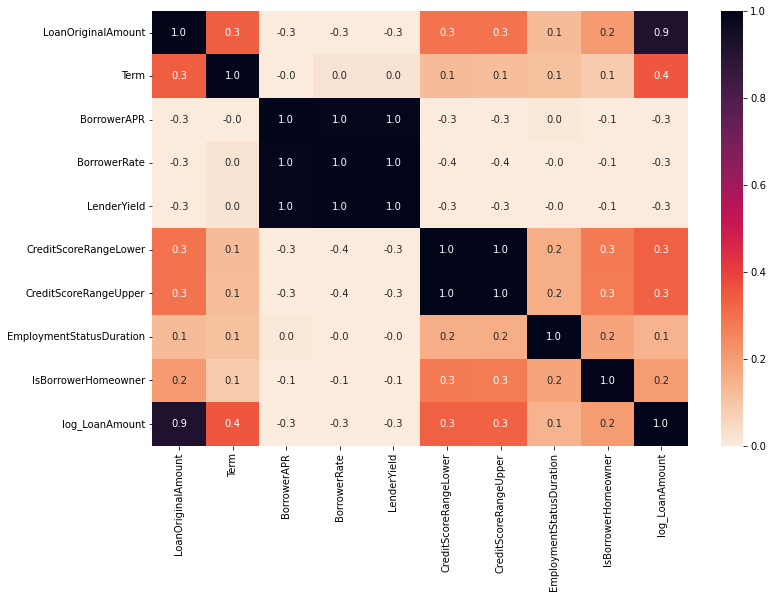

In [26]:
fig , ax = plt.subplots(figsize =(12,8))
sb.heatmap(data_.corr(), annot = True, fmt = '.1f', vmin = 0, cmap = 'rocket_r', ax = ax);

    from the above heatmap, we now clearly see that the Borrower Rate, BorrowerAPR, LoanAmount(loged loan amount) and LenderYield has a very high correlation with the each other, and the credict scores as well
    
   - therefore we can say that the above named features plays a huge impact in determining the the borrowers annual percentage rate
   
Exploring futher on the effects of borrowers APR from the dataset

In [27]:
def cuberoot_trans(x, inverse = False):
    """ quick function for computing cube root and cube operations """
    if not inverse:
        return x ** (1/3)
    else:
        return x ** 3

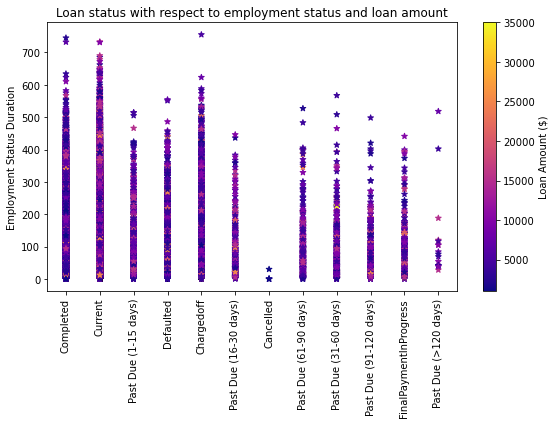

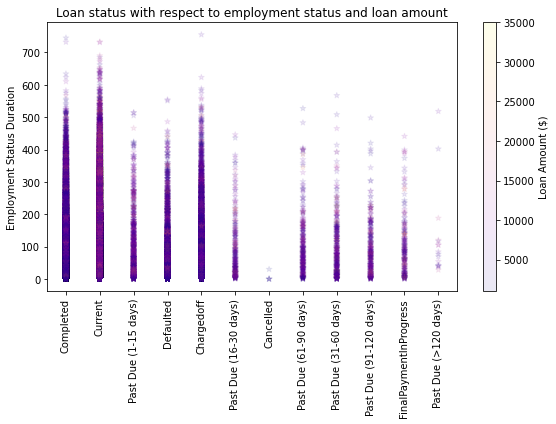

In [28]:
plt.rcParams["figure.figsize"] = [8, 6]
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots()
x = data_['LoanStatus']
y = data_['EmploymentStatusDuration']
s = ax.scatter(x, y,c = data_['LoanOriginalAmount'], marker='*', cmap='plasma', alpha = 1)
fig.colorbar(s, label = 'Loan Amount ($)')
plt.title("Loan status with respect to employment status and loan amount")
plt.ylabel("Employment Status Duration")
plt.xticks(rotation = 90)
plt.show()



plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots()
x = data_['LoanStatus']
y = data_['EmploymentStatusDuration']
s = ax.scatter(x, y,c = data_['LoanOriginalAmount'], marker='*', cmap='plasma', alpha = .09)
fig.colorbar(s, label = 'Loan Amount ($)')
plt.title("Loan status with respect to employment status and loan amount")
plt.ylabel("Employment Status Duration")
plt.xticks(rotation = 90)
plt.show()

Interestingly this shows that the employment status of the borrower has great impact on the laon status, those whoes loan has (Past due(>120days), cancealed, past (16-30days) tends to have a lower employment durations, which becomes more visible on the application of smaller alpha values to reduce the opacity of the chart

those who their loan status is (past due(1-15 days)) tends to have borrowed higher amount than others

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

>Factors that affect a loan’s outcome status:
greater population of those who completed their laons borrowed smaller ammount,and also PAST DUE(91-120 days), DEFAULTED and CHARGEDOFF are relatively from those who borrowed higher amount, therefore LoanOriginalAmount has great impact on the loan status
Some other features includes (EmploymentStatus, EmploymentStatusDuration)

#### What affects the borrower’s APR or interest rate?
basically the Borroweers state and ListingCategory has a great impact on the borrowers annual percentage rate, also some other features includes which affects it are (the borrowers rate and loan origination amount)

# SUMMERY

greater population of those who completed their laons borrowed smaller ammount,and also PAST DUE(91-120 days), DEFAULTED and CHARGEDOFF are relatively from those who borrowed higher amount, therefore LoanOriginalAmount has great impact on the loan status
Some other features includes (EmploymentStatus, EmploymentStatusDuration)


Limitations
- 
based on the scope of this analysis, the above explorelations and insights where discovered, more insights will as be discovered when explored futher, since the analysis is based on 15 features out of the 81 features present in the dataset.